# K-Nearest Neighbors


References:

How to implement k-nearest neighbors- https://appliedmachinelearning.blog/2018/01/18/conventional-approach-to-text-classification-clustering-using-k-nearest-neighbor-k-means-python-implementation/

Varying n_neighbors - https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

Accuracy measure - https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

# Pre-processing

Imports and loading dataset

In [1]:
import pandas as pd
import nltk
import re
import numpy as np
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from nltk.corpus import stopwords
warnings.filterwarnings("ignore")

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
df = pd.read_csv('train1_full.csv') 
df.head(20)

,comment_text,label
0,useless all the game,1
1,DUDE GO FUCK U,1
2,yes i ment that,0
3,pls surrender,1
4,hi GL & HF guys,0
5,fk u solo don't kill me voli,1
6,i think you should go first and fuck your mama,2
7,so bad hahah,1
8,worst team ever...,1
9,yi,0


In [4]:
# Here we transform the documents into sentences
def preprocess(df):
    df['comment_text'] = df.comment_text.str.lower()
    df['document_sentences'] = df.comment_text.str.split('.') 
    df['tokenized_sentences'] = list(map(lambda sentences: list(map(nltk.word_tokenize, sentences)), df.document_sentences))  
    df['tokenized_sentences'] = list(map(lambda sentences: list(filter(lambda lst: lst, sentences)), df.tokenized_sentences))

preprocess(df)

Split data into training and test sets

In [5]:
from sklearn.model_selection import train_test_split
train, test, y_train, y_test = train_test_split(df.drop(columns='label'), df['label'], test_size=.2)

In [6]:
def remove_items(test_list, item):
    # utility function to remove stop words
    for i in test_list:
        if(i == item):
            test_list.remove(i)
  
    return test_list

In [7]:
def preprocess_text(sen):
    sentence = sen.lower()
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    # Remove extra spaces
    sentence = re.sub(' +', ' ', sentence)
    sentence_list = sentence.split()

    # Removing stop words
    stop_words = ['u', 'ur', 'im', 'can', 'cant', 'i', 'me', 'my', 'myself', 'we', 'go', 'our', 'ours', 'ourselves', 'you', "youre", "youve", "youll", "youd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "thatll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "shouldve", 'now', 'd', 'll', 'm', 'o', 're', 'r', 'ur', 've', 'y', 'ain', 'aren', "arent", 'couldn', "couldnt", 'didn', "didnt", 'doesn', "doesnt", 'hadn', "hadnt", 'hasn', "hasnt", 'haven', "havent", 'isn', "isnt", 'ma', 'mightn', "mightnt", 'mustn', "mustnt", 'needn', "neednt", 'shan', "shant", 'shouldn', "shouldnt", 'wasn', "wasnt", 'weren', "werent", 'won', "wont", 'wouldn', "wouldnt"]
    for stop_word in stop_words:
      if stop_word in sentence_list:
        sentence_list = remove_items(sentence_list, stop_word)

    # Join back to list
    sentence = " ".join(sentence_list)

    # Remove extra spaces
    sentence = re.sub(' +', ' ', sentence)
    return sentence.lstrip()

Get a list of all messages and labels

In [8]:
X_train = []
sentences = list(train["comment_text"])
for sen in sentences:
    X_train.append(preprocess_text(sen))  

In [9]:
X_test = []
sentences1 = list(test["comment_text"])
for sen in sentences1:
    X_test.append(preprocess_text(sen))

# Tokenizing

Use the TfidfVectorizer class to convert the sentences into matrices (the X_train and X_test matrices)



In [10]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_matrix = vectorizer.fit_transform(X_train)
X_test_matrix = vectorizer.transform(X_test)

# Training and Evaluation

Train and predict with the model for 10 different values of n_neighbors

In [11]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy = []
matrices = [[]]
reports = []

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_matrix,y_train)
    prediction = knn.predict(X_test_matrix)
    accuracy.append(metrics.accuracy_score(y_test, prediction))
    matrices.append(confusion_matrix(y_test, prediction, normalize='true'))
    reports.append(classification_report(y_test,prediction))

matrices.remove([])
for i in range(len(matrices)):
  print("n_neighbors = " + str(i + 1) + ":", " ")
  print("Accuracy: " + str(accuracy[i]))
  print(matrices[i])
  print(reports[i])
  print(" ")

n_neighbors = 1:  
Accuracy: 0.9895995032598572
[[0.99475203 0.00524797 0.        ]
 [0.01103565 0.98471986 0.00424448]
 [0.         0.04       0.96      ]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3811
           1       0.99      0.98      0.99      2356
           2       0.96      0.96      0.96       275

    accuracy                           0.99      6442
   macro avg       0.98      0.98      0.98      6442
weighted avg       0.99      0.99      0.99      6442

 
n_neighbors = 2:  
Accuracy: 0.9695746662527166
[[0.99606403 0.00393597 0.        ]
 [0.06621392 0.93081494 0.00297114]
 [0.01090909 0.05454545 0.93454545]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3811
           1       0.99      0.93      0.96      2356
           2       0.97      0.93      0.95       275

    accuracy                           0.97      6442
   macro avg       0.97      0.

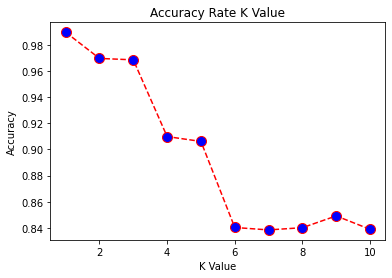

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()